# Control Aprendizaje No Supervisado

*Al finalizar, subir el notebook desarrollado a siveducMD*

**1.** Describa en qué consiste el análisis de componentes principales y cuáles son sus aplicaciones más comunes

El análisis de componentes principales consiste en la descripción de un conjunto de datos en términos de nuevas variables (componentes) no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Técnicamente, el análisis de componentes principales, busca la proyección según la cual los datos queden mejor representados, convirtiendo un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas componentes.

**2.** Describa uno de los algoritmos de agrupamiento que hemos estudiado, indique ventajas, desventajas y dé un ejemplo de aplicación.



**Respuesta:**
El modelo de mezcla de normales supone que los datos analizados provienen de una mezcla de K normales multivariadas, en que la variable que define la distribución particular (k =1...K) de la cual proviene un dato es una variable que no se observa o latente. Se trata de un modelo probabilista, por lo cual al estimar el modelo lo que se obtiene es la probabilidad de que cada dato provenga de alguna de las K distribuciones normales. El método de estimación de los parámetros de las distribuciones normales es por máxima verosimilitud. Debido a la existencia de variables latentes, la función de verosimilitud se conoce parcialmente, por lo que se aplica el algoritmo Expectation-Maximization, que se itera hasta obtener las estimaciones. 
El método requiere indicar a priori el número de normales en la mezcla K. Utilizando el Criterio de Información Bayesiana, se puede inferir el número óptimo de grupos K.

**Ventajas:**
- Se obtienen resultados en grados de certeza de que cada observación pertenezca a un grupo en particular
- Permite diversas estructuras de varianza en las variables involucradas
- Es menos sensible a datos extremos que k-means

**Desventajas:**
- Algoritmo E-M puede ser costoso computacionalmente

**Ejemplos de aplicación:** Análisis de ADN, agrupamiento de especies, Segmentación de imágenes, etc.

**Parte práctica:** Considere los datos adjuntos provenientes de un estudio de contaminación del aire que contiene mediciones de la concentración diaria de ozono (ppb), la velocidad del viento (mph), la temperatura máxima diaria (grados F) y la radiación solar (langleys) en 111 días de mayo a septiembre de 1973 en Nueva York. 

**3.** Realice un análisis exploratorio de los datos. Interprete sus resultados.
    
**4.** Escoja un método de agrupamiento que estime es adecuado para tratar estos datos. Justifique su elección y desarrolle los agrupamientos correspondientes
    
**5.** Indique y justifique los valores de los parámetros utilizados. Itere si es necesario.
    
**6.** Grafique sus resultados utilizando una proyección de los datos en el primer plano de componentes principales. Interprete sus resultados.
  
  


In [1]:
library(cluster)
library(ggplot2)
datos <-read.csv("airPollution.csv",dec=",",header=TRUE,sep=";")
print(datos[1:10,])

   ozone radiation temperature wind
1     41       190          67  7.4
2     36       118          72  8.0
3     12       149          74 12.6
4     18       313          62 11.5
5     23       299          65  8.6
6     19        99          59 13.8
7      8        19          61 20.1
8     16       256          69  9.7
9     11       290          66  9.2
10    14       274          68 10.9


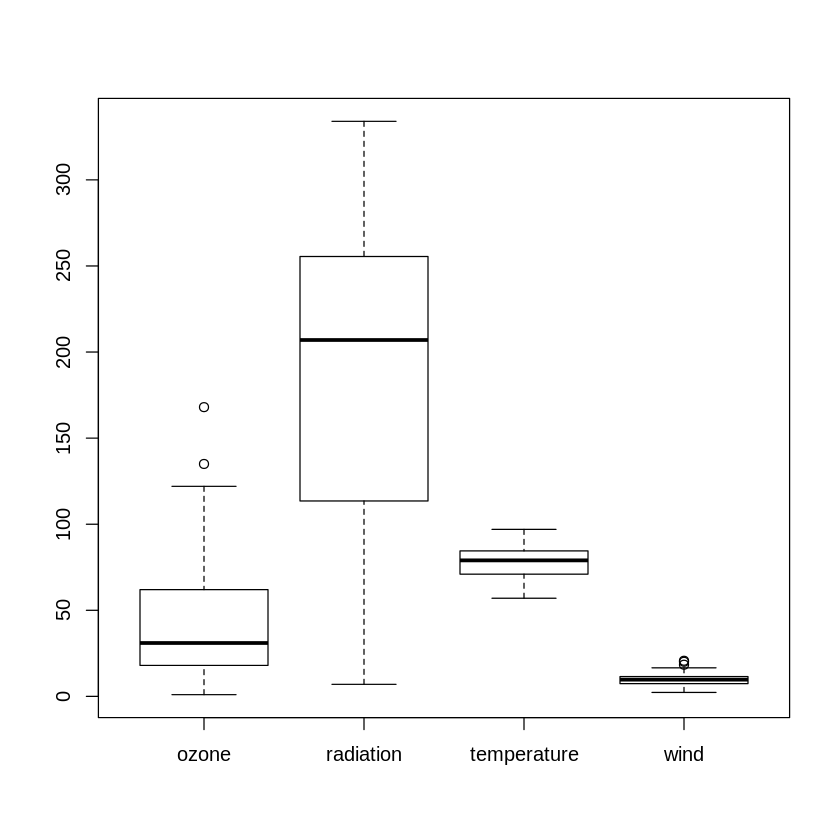

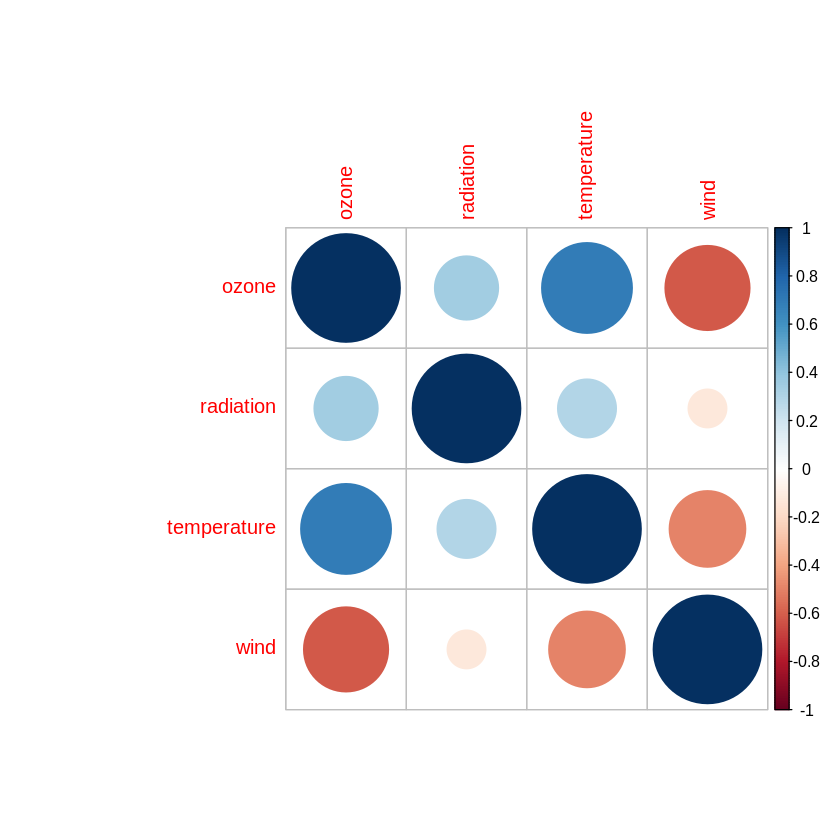

In [10]:
#3)
library(corrplot)
boxplot(datos)
correl <- cor(datos)
corrplot(correl)

**4)**
Se observan variables con varianza distintas. Esto nos induce a escoger el método GMM que se adapta al caso de datos con varianzas variables.

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
      -1761.051 111 32 -3672.808 -3693.565

Clustering table:
 1  2  3  4 
31 23 33 24 

'Mclust' model object: (EVI,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

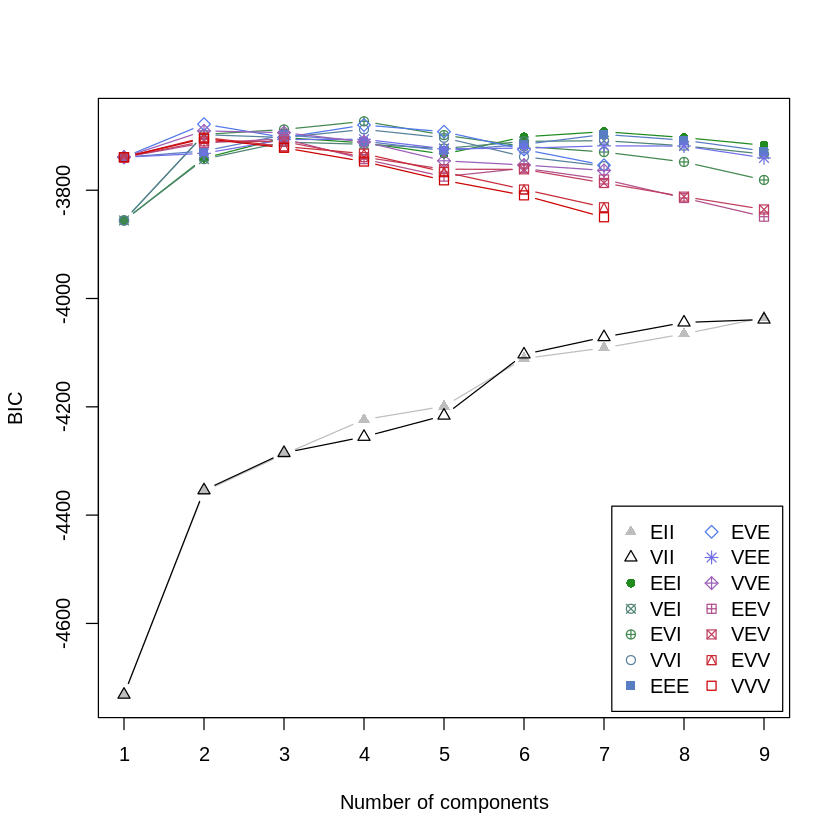

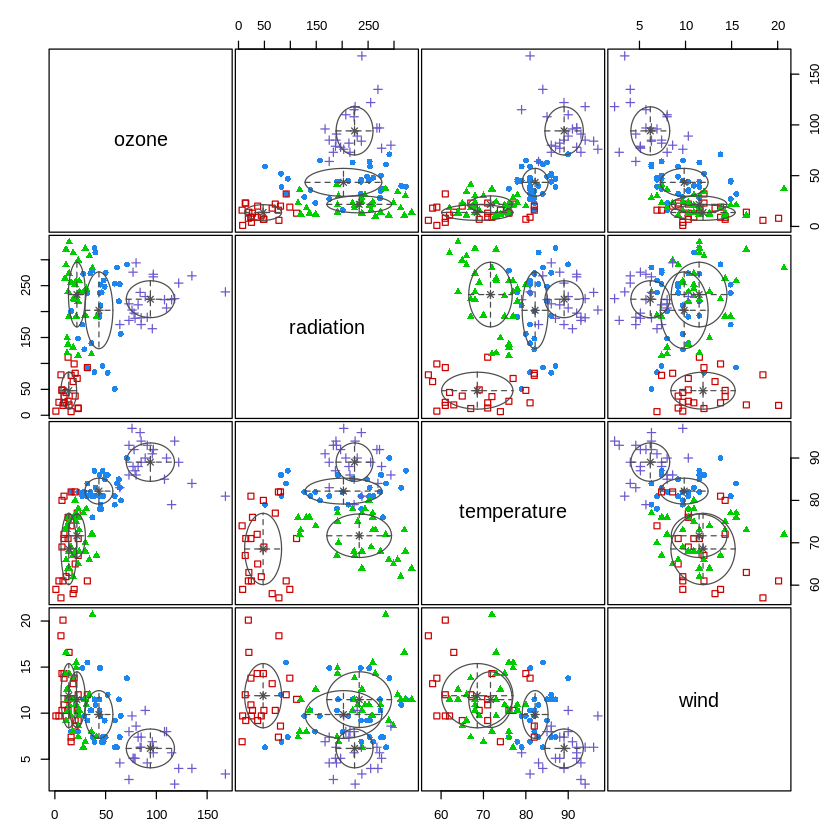

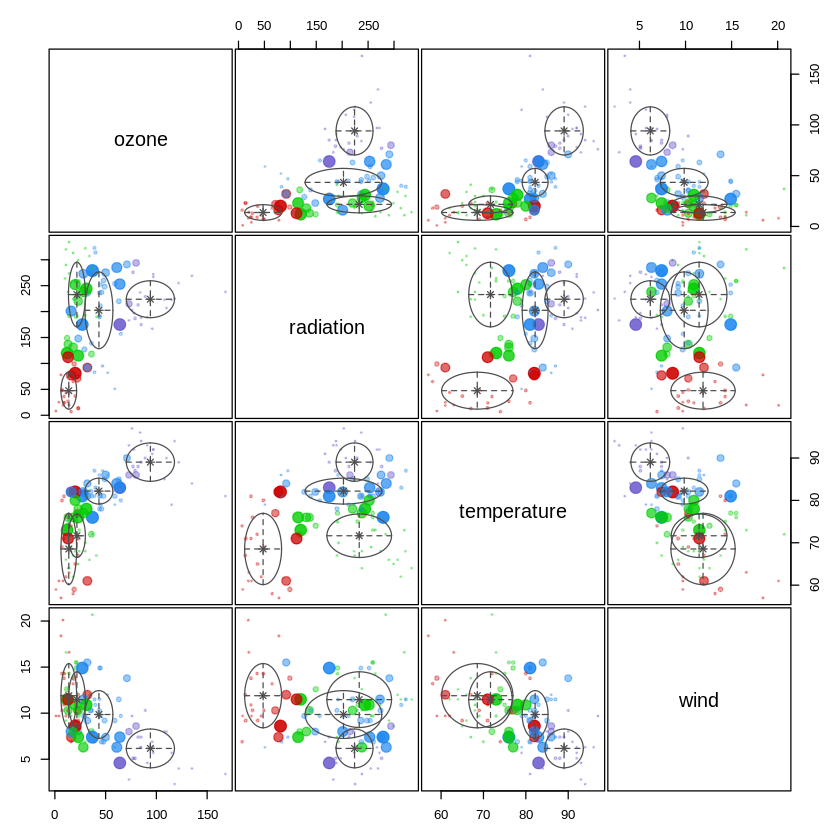

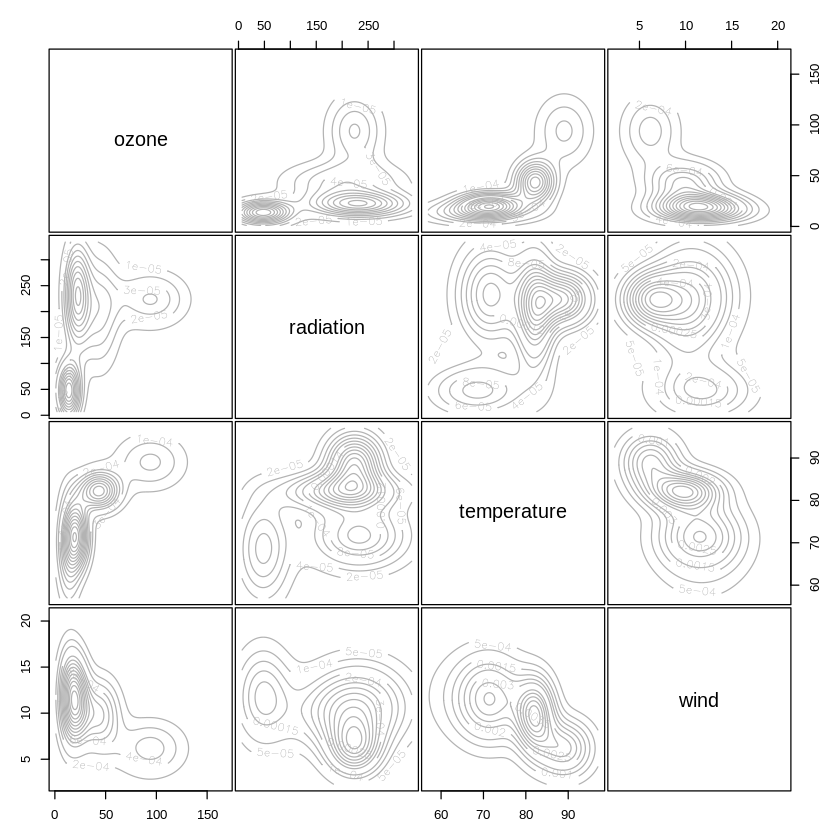

In [5]:
library(mclust)
res <-Mclust(datos)
summary(res) #resumen de los datos del algoritmo
res #Variables que retorna
plot(res)
cl <- res$classification
centers <- t(res$parameters$mean)

**5)**
Para determinar el número de grupos consideramos la configuración con máximo BIC, que en esta caso corresponde a G=4

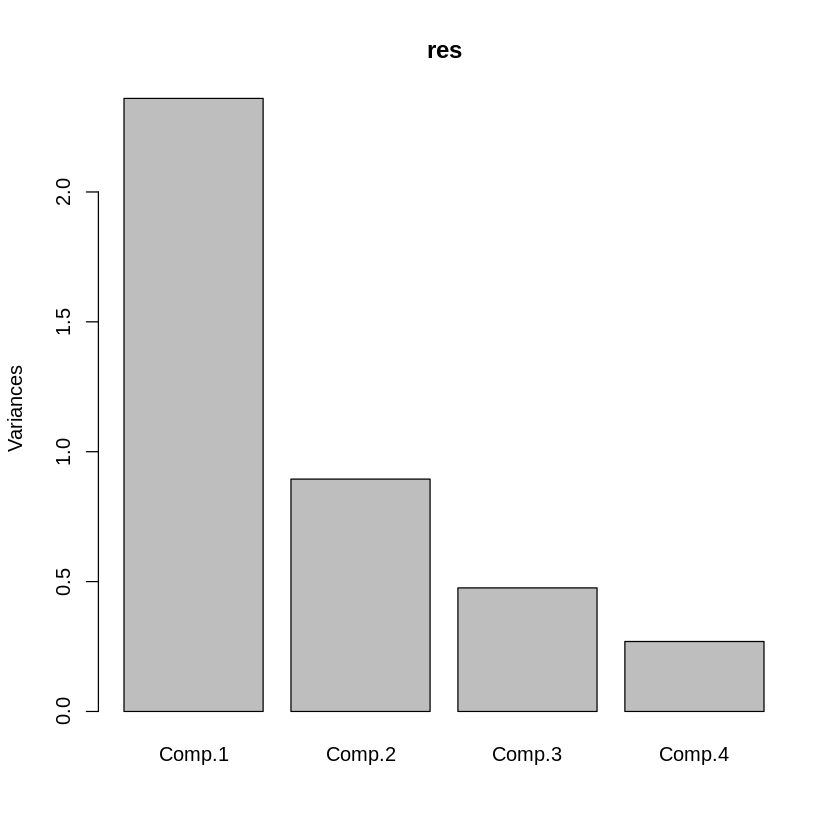

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.5362936 0.9458106 0.6897738 0.5190919 

 4  variables and  111 observations.

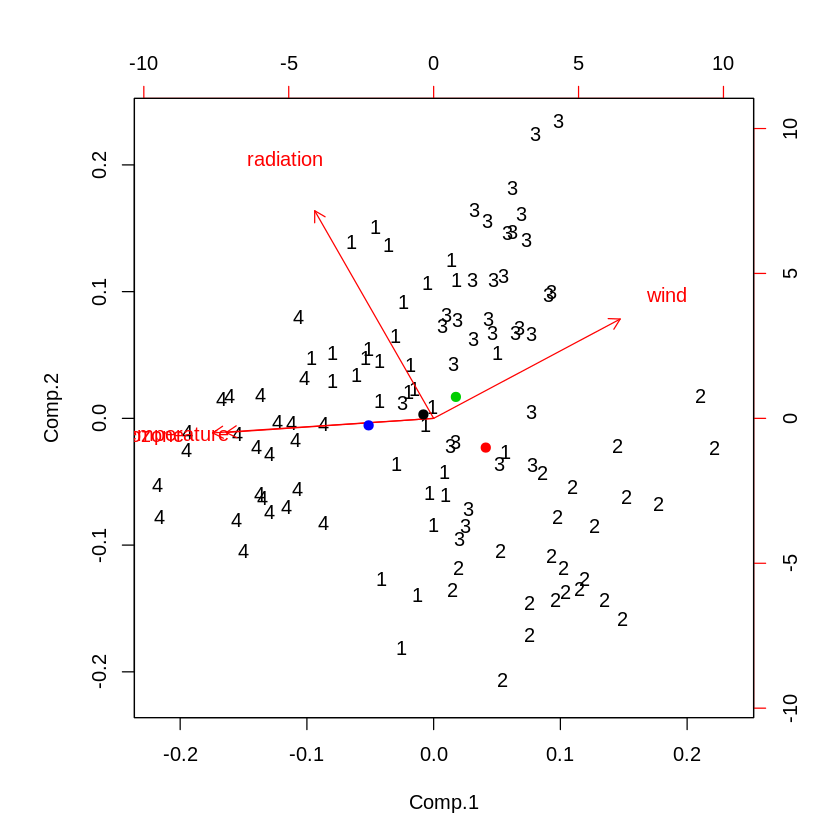

In [9]:
res <- princomp(datos, cor=TRUE)
plot(res)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
points(res2[,1:4],col=1:10,pch=19)
res

**6)**
El primer plano principal representa cerca del 67% de la varianza de los datos, esto es bastante, tal como
se aprecia en la proyección de los datos en el primer plano principal, estos se agrupan en torno a los dos grupos de variables, aquellas relacionadas con altos parámetros de ozono y radiación y la otra con parámetros temperatura y viento.
Grupo 1: Mayores valores de radiacion, bajos valores de viento, ozono y temperatura.
Grupo 2: Altos valores de viento.
Grupo 3: Altos valores de viento y radiación.
Grupo 4: Altos valores de temperatura y ozono
